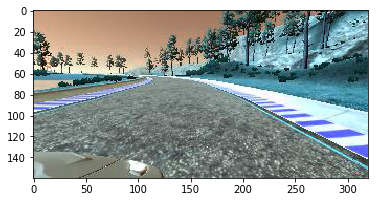

In [71]:
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

lines = []
meaurements = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []

for line in lines:
    for i in range(3):
        source_path = line[i]   # read the middle, left, right images
        filename = source_path.split('/')[-1]
        image = cv2.imread(filename)
        images.append(image)
    
    correction = 0.25 
    measurement = float(line[3])
    measurements.append(measurement)
    measurements.append(measurement+correction)
    measurements.append(measurement-correction)


augment_images, augmented_measurements = [],[]
for image,measurement in zip(images, measurements):
    augment_images.append(image)
    augmented_measurements.append(measurement)
    augment_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

plt.imshow(images[-1])



In [72]:
X_train = np.array(augment_images)
y_train = np.array(augmented_measurements)

print(X_train.shape)

(10218, 160, 320, 3)


In [73]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D

In [75]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping=((50,20),(0,0))))
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Dropout(.7))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

print('model ready')

model.compile(loss = 'mse',optimizer = 'adam')
model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 7)

model.save('model.h5')

model ready
Train on 8174 samples, validate on 2044 samples
Epoch 1/7
8174/8174 [==============================] - 16s - loss: 0.0286 - val_loss: 0.0617
Epoch 2/7
8174/8174 [==============================] - 10s - loss: 0.0206 - val_loss: 0.0511
Epoch 3/7
8174/8174 [==============================] - 10s - loss: 0.0163 - val_loss: 0.0663
Epoch 4/7
8174/8174 [==============================] - 10s - loss: 0.0134 - val_loss: 0.0704
Epoch 5/7
8174/8174 [==============================] - 10s - loss: 0.0114 - val_loss: 0.1004
Epoch 6/7
8174/8174 [==============================] - 10s - loss: 0.0092 - val_loss: 0.0903
Epoch 7/7
8174/8174 [==============================] - 10s - loss: 0.0081 - val_loss: 0.0916
